In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import os

# Importing necessary classes for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importing functions for evaluating model performance
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Importing functions for data splitting and training models
from sklearn.model_selection import train_test_split

# Importing various machine learning algorithms
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_3372\1057146492.py:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")


In [3]:
df.shape

(426331, 75)

In [4]:
df[' Label'].value_counts()

 Label
7     39850
11    39744
6     39417
10    39221
2     39064
3     38952
4     37786
1     37420
8     36529
9     35954
5     27447
0     14941
12        6
Name: count, dtype: int64

In [5]:
df.head(5)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,51:39.8,28415,97,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,51:39.8,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,51:39.9,48549,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,51:39.9,48337,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,51:39.9,32026,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [6]:
data_X = df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [7]:
data_y = df[' Label']

In [8]:
df.isnull().sum().sum()

0

In [9]:
data_y.unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
from sklearn.preprocessing import LabelEncoder 

In [11]:
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)
data_y_trans

array([ 1,  1,  1, ..., 11, 11, 11], dtype=int64)

In [12]:
le_fid = LabelEncoder()
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

le_SIP = LabelEncoder()
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

le_DIP = LabelEncoder()
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [13]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,264488,28,634,160,60495,17,389262,28415,97,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,201181,145,634,35,60495,17,389262,2,2,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,257973,28,634,160,46391,17,389263,48549,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,242104,28,634,160,11894,17,389263,48337,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,249417,28,634,160,27878,17,389263,32026,200,0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426326,176473,28,57151,160,14047,17,316765,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
426327,186908,28,58534,160,39869,17,316766,2,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
426328,193532,28,59491,160,26346,17,316767,2,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
426329,179578,28,57565,160,51456,17,316768,3,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [14]:
data_X.dtypes

Flow ID                int32
 Source IP             int32
 Source Port           int64
 Destination IP        int32
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
 Inbound               int64
Length: 73, dtype: object

In [15]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [16]:
model.feature_importances_

array([6.77568628e-02, 8.01110703e-03, 8.17844982e-02, 3.17644788e-03,
       1.10223794e-02, 1.91409483e-02, 3.05180294e-01, 9.72673147e-03,
       5.12439391e-03, 4.27024677e-04, 1.27973104e-02, 1.57276875e-04,
       2.36693247e-02, 3.51142931e-02, 3.93145676e-02, 1.79746055e-03,
       3.33532097e-04, 2.79525029e-04, 4.74122329e-04, 2.67950392e-04,
       2.17581504e-02, 1.57739481e-02, 3.31969666e-03, 1.62670642e-03,
       3.30502969e-03, 3.80000859e-03, 9.91150408e-03, 4.43727068e-03,
       1.28259977e-03, 4.65529045e-03, 5.59537451e-03, 2.83163969e-04,
       1.19578306e-04, 8.84656904e-05, 1.74415740e-04, 1.20123849e-04,
       5.29405370e-04, 1.15306089e-02, 3.39942321e-04, 1.76337235e-02,
       5.52223473e-04, 3.51357577e-02, 2.16479953e-02, 2.92811316e-02,
       2.60304047e-03, 1.04573167e-03, 2.23232867e-05, 4.32174623e-04,
       3.25728480e-02, 3.26727000e-03, 1.70193264e-03, 1.20869078e-03,
       2.88007870e-02, 3.71856802e-02, 9.39843494e-04, 1.17280808e-02,
      

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

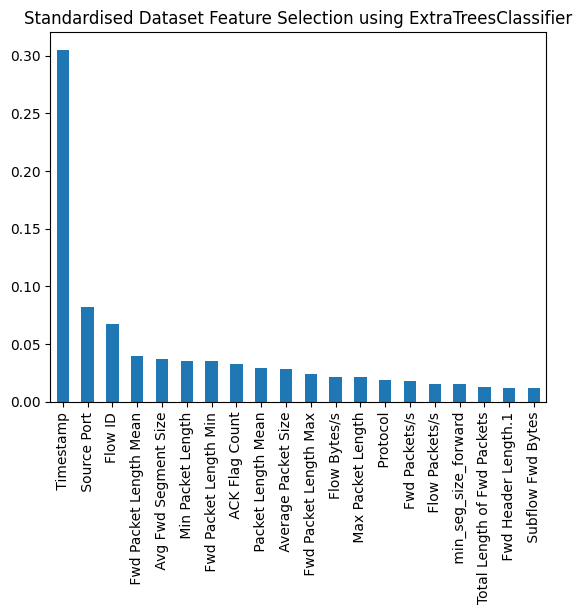

In [17]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [18]:
data_X.shape 

(426331, 73)

In [19]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [20]:
data_new_20features_X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
0,389262,634,440.0,440.0,264488,440.0,440.0,444.536083,0,440.0,440.0,1.502024e+06,440.0,17,3.413690e+03,3.413690e+03,42680.0,42680,60495,96
1,389262,634,440.0,440.0,201181,440.0,440.0,660.000000,0,440.0,440.0,4.400000e+08,440.0,17,1.000000e+06,1.000000e+06,880.0,880,60495,1
2,389263,634,440.0,440.0,257973,440.0,440.0,442.200000,0,440.0,440.0,1.812602e+06,440.0,17,4.119549e+03,4.119549e+03,88000.0,88000,46391,199
3,389263,634,440.0,440.0,242104,440.0,440.0,442.200000,0,440.0,440.0,1.820552e+06,440.0,17,4.137617e+03,4.137617e+03,88000.0,88000,11894,199
4,389263,634,440.0,440.0,249417,440.0,440.0,442.200000,0,440.0,440.0,2.747767e+06,440.0,17,6.244926e+03,6.244926e+03,88000.0,88000,27878,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426326,316765,57151,401.0,401.0,176473,401.0,401.0,601.500000,0,401.0,401.0,8.020000e+08,401.0,17,2.000000e+06,2.000000e+06,802.0,802,14047,1
426327,316766,58534,375.0,375.0,186908,375.0,375.0,562.500000,0,375.0,375.0,3.750000e+08,375.0,17,1.000000e+06,1.000000e+06,750.0,750,39869,1
426328,316767,59491,375.0,375.0,193532,375.0,375.0,562.500000,0,375.0,375.0,3.750000e+08,375.0,17,1.000000e+06,1.000000e+06,750.0,750,26346,1
426329,316768,57565,383.0,383.0,179578,383.0,383.0,574.500000,0,383.0,383.0,2.553333e+08,383.0,17,6.666667e+05,6.666667e+05,766.0,766,51456,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

In [22]:
X_train.shape 

(298431, 20)

In [23]:
X_test.shape 

(127900, 20)

In [24]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [25]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [26]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [27]:
X_train_std_20.shape 

(298431, 73)

In [28]:
y_train_20.shape

(298431,)

In [29]:
X_test_std_20.shape 

(127900, 73)

In [30]:
y_test_20.shape 

(127900,)

In [31]:
y_test_20.shape 

(127900,)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)


RandomForestClassifier()

In [33]:
rf_y_pred = rf.predict(X_test_std_20)

In [34]:
rf_y_pred

array([ 8,  4,  7, ...,  4, 10,  2], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [36]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4512
           1       1.00      0.99      0.99     11195
           2       1.00      0.99      1.00     11661
           3       0.99      0.99      0.99     11745
           4       0.99      1.00      1.00     11343
           5       0.99      1.00      0.99      8247
           6       1.00      1.00      1.00     11940
           7       0.99      0.99      0.99     11883
           8       1.00      1.00      1.00     10868
           9       1.00      1.00      1.00     10779
          10       0.99      0.99      0.99     11756
          11       0.99      1.00      1.00     11970
          12       0.00      0.00      0.00         1

    accuracy                           0.99    127900
   macro avg       0.92      0.92      0.92    127900
weighted avg       0.99      0.99      0.99    127900



C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[ 4512     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0 11088     0    18     1    29     0    54     0     1     0     4
      0]
 [    0     5 11558    92     0     5     0     1     0     0     0     0
      0]
 [    0     3     0 11623    92    20     0     2     1     0     4     0
      0]
 [    0     0     0     4 11337     0     0     2     0     0     0     0
      0]
 [    0    10     0     0     0  8232     0     2     3     0     0     0
      0]
 [    0     5     0     2     0     3 11928     2     0     0     0     0
      0]
 [    1    20     0     1    11    16     1 11741     4     0    88     0
      0]
 [    0     0     0     0     0     0     0     0 10817    51     0     0
      0]
 [    0     0     0     0     0     0     0     0     0 10779     0     0
      0]
 [    0     1     0     0     0     0     0     9     0     0 11646   100
      0]
 [    0     1     0     0     1     0     0    11     0     

In [38]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 99.46677091477717


In [39]:
import joblib

# Save the trained model to a file
model_filename = "random_forest_model.pkl"
joblib.dump(rf, model_filename)

print("Random Forest model saved as:", model_filename)

Random Forest model saved as: random_forest_model.pkl


In [40]:
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train_std_20, y_train_20)

lg_y_pred = lg.predict(X_test_std_20)

# Cell 9: Evaluate results
from sklearn.metrics import classification_report
print("Classification Report for LightGBM: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(lg_y_pred)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14847
[LightGBM] [Info] Number of data points in the train set: 298431, number of used features: 73
[LightGBM] [Info] Start training from score -3.353948
[LightGBM] [Info] Start training from score -2.431826
[LightGBM] [Info] Start training from score -2.387886
[LightGBM] [Info] Start training from score -2.395064
[LightGBM] [Info] Start training from score -2.423547
[LightGBM] [Info] Start training from score -2.743628
[LightGBM] [Info] Start training from score -2.385189
[LightGBM] [Info] Start training from score -2.367514
[LightGBM] [Info] Start training from score -2.453566
[LightGBM] [Info] Start training from score -2.472687
[LightGBM] [Info] Start training from score -2.385626
[LightGBM] [Info] Start training from score -2.3

C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
